# Simple Brownian motion



 #### [Back to main page](https://petrosyan.page/fall2020math3215)


### Discrete Brownian motion (random walk)


In the discrete-time Brownian motion (commonly called **random walk**) a particle starts at 0 on the line and it moves randomly left or right by the increment of $X_i$ at time $i$. We assume $X_i$ are i.i.d. with $\mu=0$, $\sigma=1$. Let $Y_n$ denote the position of the particle at time $n$:

$$Y_n=\sum_{i=1}^nX_i=n\bar X_n$$

where $\bar X_n$ is the sample mean of $X_1,\dots, X_n:$

$$\bar X_n=\frac{X_1+\cdots+X_n}{n}.$$


Let $\bar Z_n$ be the Z-score of $\bar X_n$:

$$\bar Z_n=\frac{\bar X_n-\mu}{\frac{\sigma}{\sqrt{n}}}=\sqrt{n}\bar X_n$$
 
using the fact by our assumption, $\mu=0, \sigma=1$. From here 

$$Y_n=\sqrt{n} \bar Z_n.$$

From the Central Limit Theorem, when $n$ is sufficiently large, $Y_n$  approximately has the distribution  $N(0, n)$  at time $n$. 

In the numerical example below, we simulate an experiment with large number of particles (think of ink droplet spreading in a linear media). We expect that  they will create a cloud that has approximately normal distribution around 0 and expansion speed $\sqrt{n}$ (standard deviation measures the spread around the mean and is equal to $\sqrt{n}$). Which we observe below. The $X_i$ are taken to be from the uniform distribution on 

$$\left[-\sqrt{3},\sqrt{3}\right]$$
 
for which $\mu=0$, $\sigma=1$. The blue dot is one of the particles that is highlighted to show one possible trajectory. 




<IPython.core.display.Javascript object>


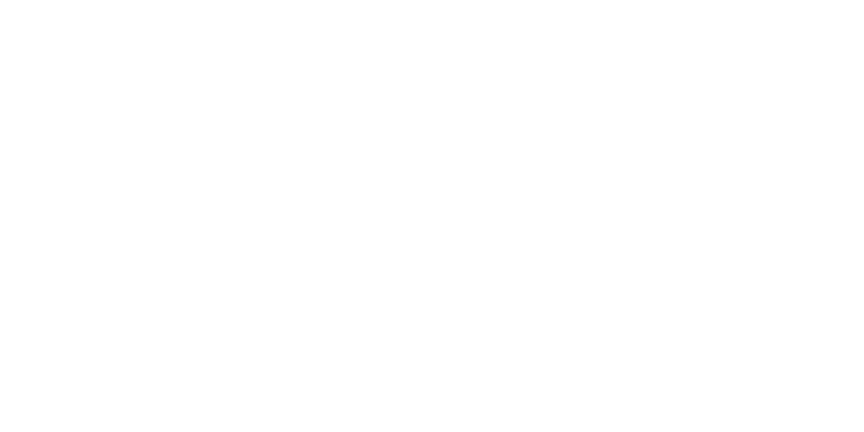

In [104]:
# nbi:hide_in
%matplotlib notebook


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
N = 50 #number of particles
S = 1000 # number of steps

# generate data from uniform distribution
a = -0.5
b = 0.5
mean = (b+a)/2
sigma = np.sqrt((b-a)**2/12)

data = (np.random.rand(N, S)*(b-a)+a)/sigma

# create the plot
fig = plt.figure(figsize=(12, 6))
grid = plt.GridSpec(3, 4, hspace=2, wspace=2)
ax1 = fig.add_subplot(grid[0, :])
ax2 = fig.add_subplot(grid[1:, :])

def pdf_func(xdata, mu, sigma):
    val = np.exp(-np.power(xdata-mu,2)/(2*sigma**2))/(sigma *np.sqrt(2*np.pi))
    return val

def brownian(step):
    step +=1
    y = np.sum(data[:, 0:step], axis=1)
    z = y/np.sqrt(step)
    
    ax1.clear()
    ax1.set_xlim(-30,30)
    ax1.set_yticks([])

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    
    ax1.axhline(y=0, color='k', zorder=1, linewidth=0.3)
    
    ax1.set_title("The particles")
    
    ax2.clear()
    ax2.set_xlim(-30,30)
    ax2.set_title("The particle density histogram vs  N(0,n) pdf")

    

    # Add the points
    ax1.scatter(y[1:], np.zeros(N-1), s=20, zorder=2, color="black")
    ax1.scatter(y[0], 0, s=50, zorder=3, color="blue")

    # Add the desnity histogram
    ax2.hist(y, bins="fd", density=True, color='#039be5', edgecolor='black', linewidth=1)

    # plot normal distribution
    xvalues = np.linspace(np.min(y), np.max(y), 1000)
    ax2.plot(xvalues, pdf_func(xvalues, 0, np.sqrt(step)), linewidth=2, color="red")

    plt.tight_layout
    plt.show()

# Animate
ani = FuncAnimation(fig, brownian, frames=100, repeat=False)
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)

plt.tight_layout
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.close();

### Continuous Brownian motion

Imagine now the particle makes a step every $\delta$ seconds. Assume the increments $X_1,\dots, X_n$ are i.i.d. with mean $\mu=0$ and $\sigma=\delta$. Denote  $t=n\delta$ (the time of the $n$-th step). Then, 
for 

$$Y(t)=\sum_{i=1}^nX_i=n\bar X_n$$

can be seen as above that

$$Y(t)=\sqrt{\delta n}\bar Z_n=\sqrt{t}\bar Z_n.$$

If we keep $t$ fixed and let $n\to \infty$ (to get continuous time), from the Central Limit Theorem in the limit we will have that $Y(t)$ is $N(0,t)$ (i.e. has the $\sqrt{t}$ speed of spread at time $t$).

This fact leads to the formal definition of the continuous-time Brownian motion:


**Definition**
<div class="alert alert-block alert-info">
A time dependent random variable $Y(t)$ is called a Brownian motion if it satisfies the following conditions:
    
1. $Y(0)=0$,   
2. $Y(s)-Y(t)$ has distribution $N(0, s-t)$,
3. For any $t_1<\cdots<t_n$, the increments $X_i=Y(t_{i+1})-Y(t_i)$ are independent.
    
</div>    





